# Barcelona Air Pollution Analysis

Sultan Alkadhi, 6/7/22

## Introduction

The air pollution dataset was compiled by Barcelona's Open Data BCN and is avaiable on Kaggle. The file contains 2017 measurements of O3 (tropospheric Ozone), NO2 (Nitrogen dioxide) and PM10 (Suspended particles). In addition, the file includes information about the air quality monitoring stations (latitudes, longtitudes, and times of measurements).

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib as mlp
import folium
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [272]:
sns.set(font_scale=1.5)
plt.style.use('ggplot')
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,4

In [273]:
# read dataset
air = pd.read_csv("../data/air_quality_Nov2017.csv")

## Data cleaning

In [274]:
#clean columns function
def clean_columns(dataframe):
    for column in dataframe:
        dataframe.rename(columns = {column : column.lower().replace(" ", "_")},
                        inplace = 1)
    return dataframe

In [275]:
#clean columns to lowercase and replace spaces with underscores
air = clean_columns(air)

In [276]:
air.info()
#pm10 and o3 have the most null values, but since we'll use them in the analysis, we'll drop the rows and not the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station       5744 non-null   object 
 1   air_quality   5744 non-null   object 
 2   longitude     5744 non-null   float64
 3   latitude      5744 non-null   float64
 4   o3_hour       4268 non-null   object 
 5   o3_quality    4268 non-null   object 
 6   o3_value      4101 non-null   float64
 7   no2_hour      5689 non-null   object 
 8   no2_quality   5689 non-null   object 
 9   no2_value     5460 non-null   float64
 10  pm10_hour     3722 non-null   object 
 11  pm10_quality  3722 non-null   object 
 12  pm10_value    3647 non-null   float64
 13  generated     5744 non-null   object 
 14  date_time     5744 non-null   int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 673.2+ KB


In [278]:
#drop rows with missing values
air = air.dropna()

In [279]:
air.isnull().sum()

station         0
air_quality     0
longitude       0
latitude        0
o3_hour         0
o3_quality      0
o3_value        0
no2_hour        0
no2_quality     0
no2_value       0
pm10_hour       0
pm10_quality    0
pm10_value      0
generated       0
date_time       0
dtype: int64

In [281]:
# Stations are all prefixed with 'Barcelona - <name>', we'll remove the prefix
def rename_stations(dataframe):
    for station in dataframe.station.unique():
        dataframe.loc[dataframe.station == station, "station"] = station[12:]
    return dataframe

In [282]:
rename_stations(air)

station air_quality  longitude  latitude o3_hour o3_quality  \
1         Eixample    Moderate     2.1538   41.3853      0h       Good   
5      Palau Reial        Good     2.1151   41.3875     23h       Good   
7     Observ Fabra        Good     2.1239   41.4183     23h       Good   
9         Eixample        Good     2.1538   41.3853      0h       Good   
13     Palau Reial        Good     2.1151   41.3875      0h       Good   
...            ...         ...        ...       ...     ...        ...   
5735  Observ Fabra        Good     2.1239   41.4183     21h       Good   
5738        Gràcia        Good     2.1534   41.3987     22h       Good   
5740   Vall Hebron        Good     2.1480   41.4261     22h       Good   
5741   Palau Reial        Good     2.1151   41.3875     22h       Good   
5743  Observ Fabra        Good     2.1239   41.4183     22h       Good   

      o3_value no2_hour no2_quality  no2_value pm10_hour pm10_quality  \
1          1.0       0h    Moderate      113.0        0h         Good   
5         11.0      23h        Good       57.0       23h         Good   
7         58.0      23h        Good        3.0       23h         Good   
9          6.0       0h        Good       80.0        1h         Good   
13        27.0       0h        Good       38.0        1h         Good   
...        ...      ...         ...        ...       ...          ...   
5735      60.0      21h        Good       23.0       21h         Good   
5738       8.0      22h        Good       65.0       22h         Good   
5740      32.0      22h        Good       31.0       22h         Good   
5741      40.0      22h        Good       20.0       22h         Good   
5743      64.0      22h        Good       21.0       22h         Good   

      pm10_value         generated   date_time  
1           36.0   01/11/2018 0:00  1541027104  
5           23.0   01/11/2018 0:00  1541027104  
7           25.0   01/11/2018 0:00  1541027104  
9           35.0   01/11/2018 1:00  1541030725  
13          24.0   01/11/2018 1:00  1541030725  
...          ...               ...         ...  
5735        12.0  30/11/2018 22:00  1543611902  
5738        22.0  30/11/2018 23:00  1543615502  
5740        21.0  30/11/2018 23:00  1543615502  
5741        15.0  30/11/2018 23:00  1543615502  
5743        12.0  30/11/2018 23:00  1543615502  

[2853 rows x 15 columns]

In [283]:
#check outliers in latitude
air.latitude.describe()

count      2853.000000
mean      13972.056884
std       74667.293888
min          41.385300
25%          41.387500
50%          41.398700
75%          41.418300
max      414261.000000
Name: latitude, dtype: float64

In [284]:
#clean erroneous values, move the decimal
air['latitude'] = air['latitude'].replace([414261.000000],41.426100)
air['latitude'] = air['latitude'].replace([414183.000000],41.418300)
air['latitude'] = air['latitude'].replace([413875.000000],41.387500)
air['latitude'] = air['latitude'].replace([413853.000000],41.385300)


In [285]:
air.latitude.describe()

count    2853.000000
mean       41.403822
std         0.017456
min        41.385300
25%        41.387500
50%        41.398700
75%        41.418300
max        41.426100
Name: latitude, dtype: float64

In [286]:
# check column type
air.date_time.dtypes

dtype('int64')

In [287]:
##date_time is in Unix time, we'll convert it to datetime
air['date_time'] = pd.to_datetime(air['date_time'],unit='s')
air.date_time.dtypes

dtype('<M8[ns]')

In [288]:
air.air_quality.unique()
#original dataset HAD 3 types of air quality including '--' which were all nas in gas values

array(['Moderate', 'Good'], dtype=object)

In [290]:
air.no2_quality.unique()

array(['Moderate', 'Good'], dtype=object)

In [291]:
air.pm10_quality.unique()

array(['Good', 'Moderate'], dtype=object)

In [292]:
air.o3_quality.unique()
#O3 has not reached 'Moderate' level.

array(['Good'], dtype=object)

Spanish standards in 2019 were:

110 for O3 (1h)

35 for PM10 (24h)

90 for NO2 (1h) - WHO is 25 (24h) -far more stringent

https://web.archive.org/web/20190410231607/https://mediambient.gencat.cat/es/05_ambits_dactuacio/atmosfera/qualitat_de_laire/avaluacio/icqa/que_es_lindex_catala_de_qualitat_de_laire/index.html
https://www.c40knowledgehub.org/s/article/WHO-Air-Quality-Guidelines?language=en_US 

## Data Visualization

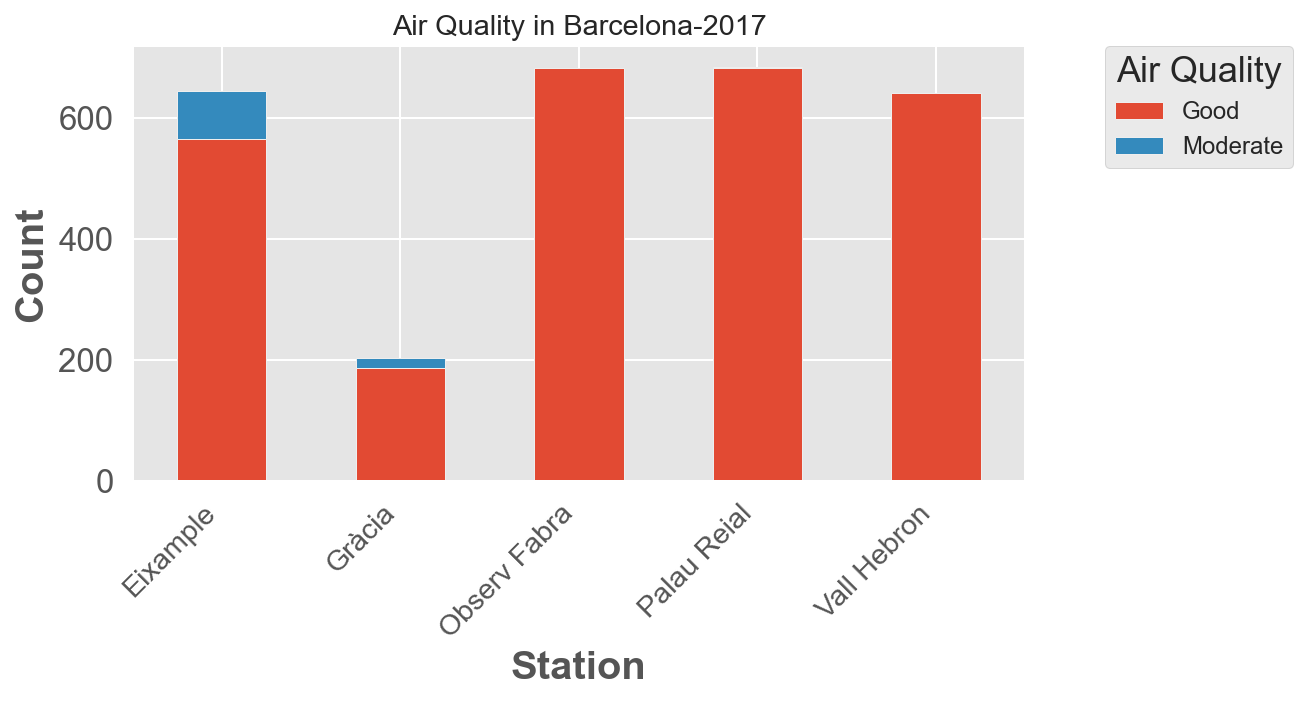

In [308]:
station_quality = air.groupby(['station', 'air_quality']).size()
station_quality_df = pd.DataFrame(station_quality).reset_index()
station_quality_df.rename(columns = {0:'Count'}, inplace = True)
station_quality_df
stacked_bar = station_quality_df.pivot(index='station', columns='air_quality', values='Count').reset_index()
#plot stacked_bar
stacked_bar.plot(x='station', kind='bar', stacked=True,
        title='Air Quality in Barcelona-2017')
plt.xticks( rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.xlabel('Station', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=20, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('Air Quality');

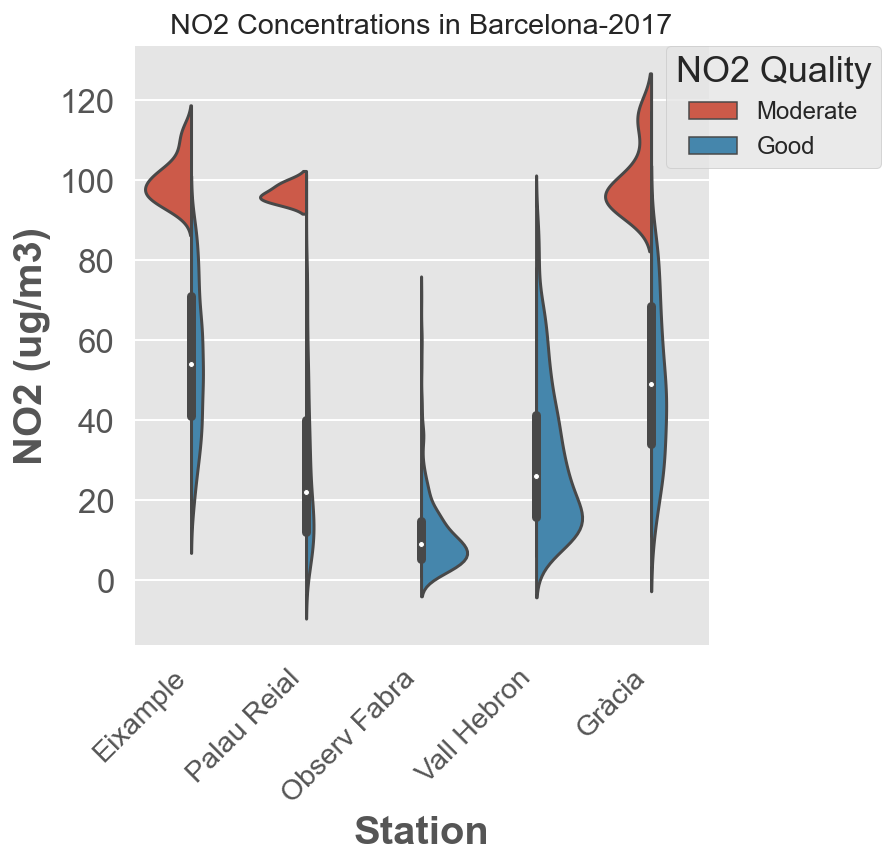

In [312]:
#NO2 Value and Quality per Station
sns.catplot(x="station", y="no2_value", data=air, hue='no2_quality', kind='violin', split=True, legend=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
#label axes
plt.xlabel('Station', fontsize=20, fontweight='bold')
plt.ylabel('NO2 (ug/m3)', fontsize=20, fontweight='bold')
plt.title('NO2 Concentrations in Barcelona-2017')
#label legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('NO2 Quality')




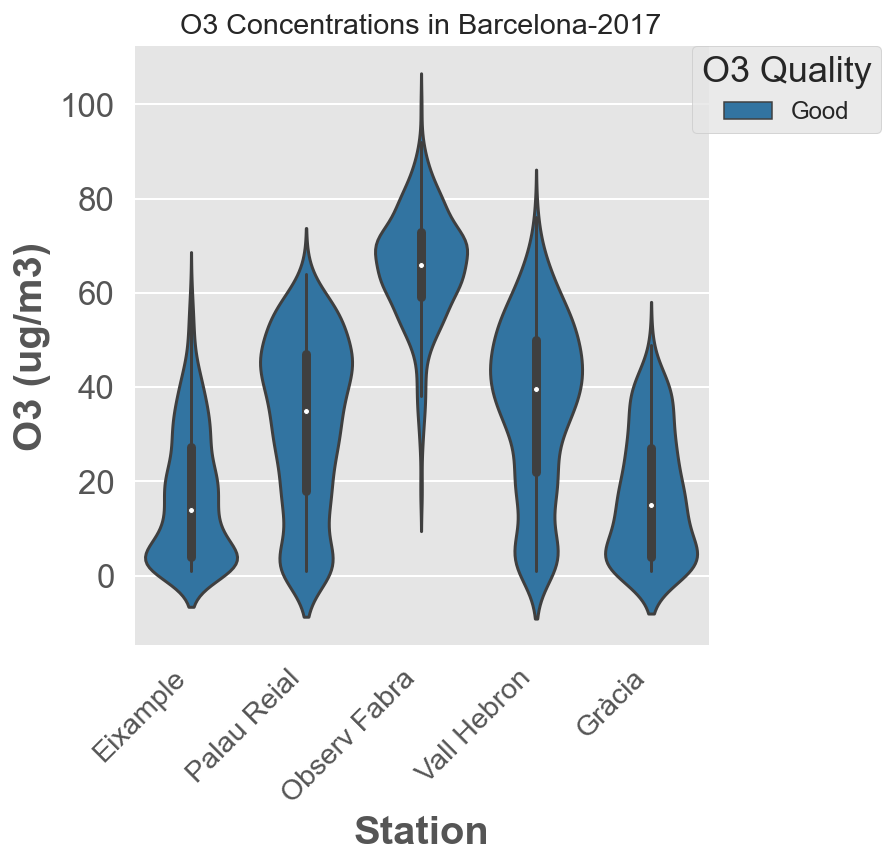

In [313]:
#O3 Value and Quality per Station
sns.catplot(x="station", y="o3_value", data=air, kind='violin', color='tab:blue', hue='o3_quality', legend=False, palette='tab10')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.xlabel('Station', fontsize=20, fontweight='bold');
plt.ylabel('O3 (ug/m3)', fontsize=20, fontweight='bold');
plt.title('O3 Concentrations in Barcelona-2017');
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('O3 Quality');

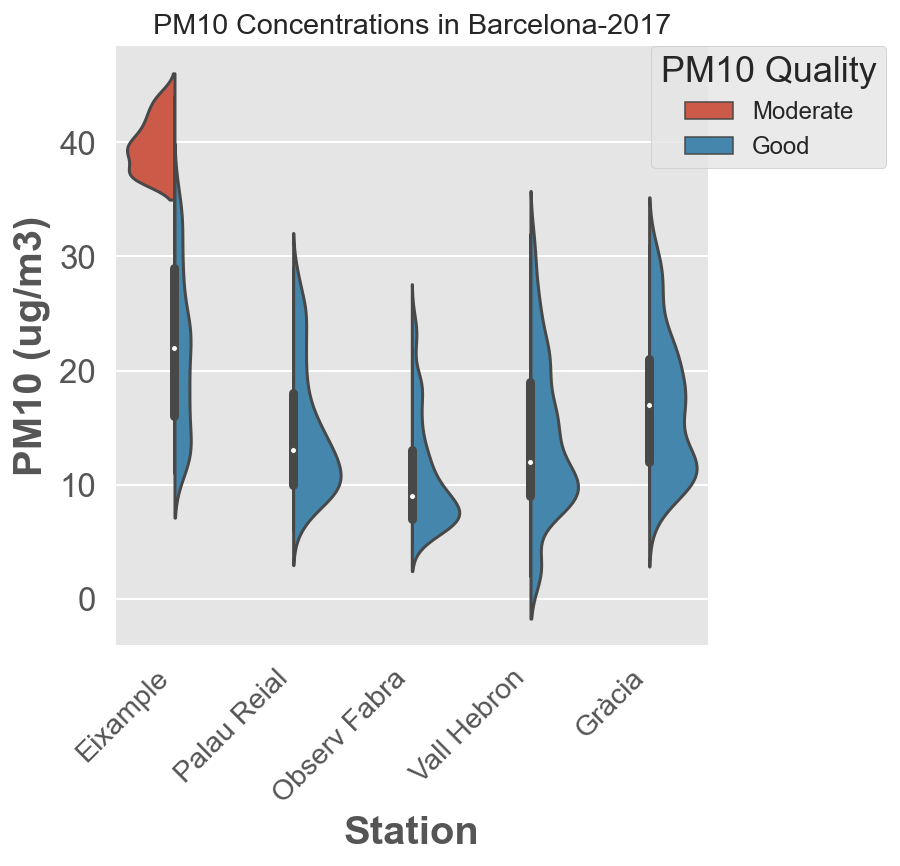

In [315]:
#pm10 value and quality per station
sns.catplot(x="station", y="pm10_value", data=air, hue='pm10_quality', kind='violin', split=True, legend=False, hue_order = ['Moderate', 'Good'])
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.xlabel('Station', fontsize=20, fontweight='bold');
plt.ylabel('PM10 (ug/m3)', fontsize=20, fontweight='bold');
plt.title('PM10 Concentrations in Barcelona-2017');
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('PM10 Quality');

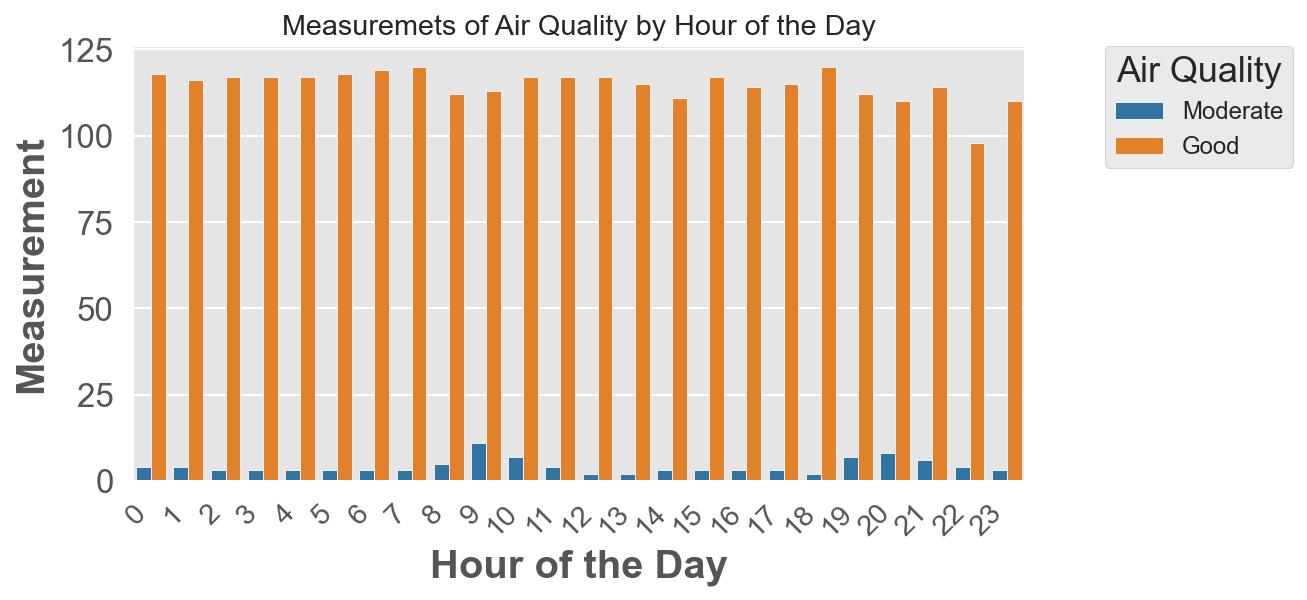

In [316]:
sns.countplot(x=air['date_time'].dt.hour, data=air, palette='tab10', hue='air_quality')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.xlabel('Hour of the Day', fontsize=20, fontweight='bold');
plt.ylabel('Measurement', fontsize=20, fontweight='bold');
plt.title('Measuremets of Air Quality by Hour of the Day');
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('Air Quality');

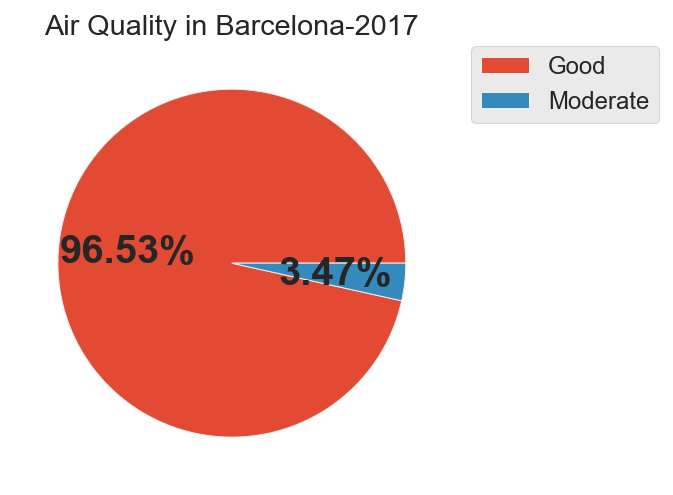

In [317]:
#pie plot of air quality
air.groupby('air_quality').size().plot(kind='pie', autopct='%.2f%%', textprops={'fontsize': 20, 'fontweight': 'bold'}, labels=["",""])
plt.title('Air Quality in Barcelona-2017')
plt.ylabel('')
plt.legend(labels=['Good', 'Moderate'], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=12);



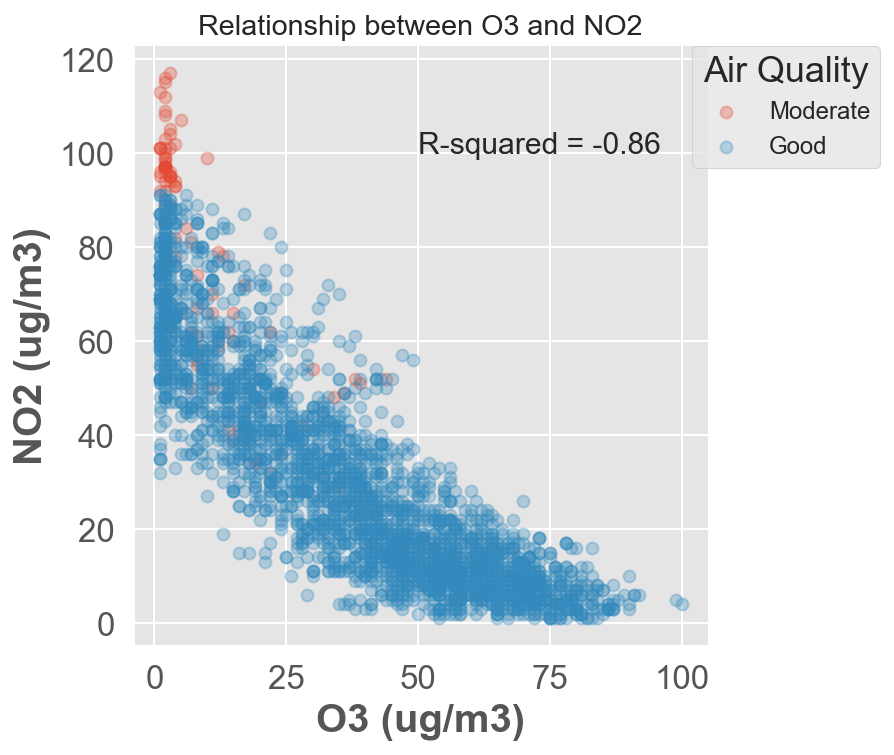

In [318]:
cor_o_n = air[['o3_value','no2_value']].corr()
str_cor_o_n = str(round(cor_o_n.iloc[0,1], 2))
sns.lmplot(x='o3_value', y='no2_value', data=air, hue='air_quality', fit_reg=False, scatter_kws={'alpha':0.3}, legend=False)
plt.annotate("R-squared = " + str_cor_o_n, xy=(50, 100), fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('Air Quality');
plt.xlabel('O3 (ug/m3)', fontsize=20, fontweight='bold');
plt.ylabel('NO2 (ug/m3)', fontsize=20, fontweight='bold');
plt.title('Relationship between O3 and NO2');

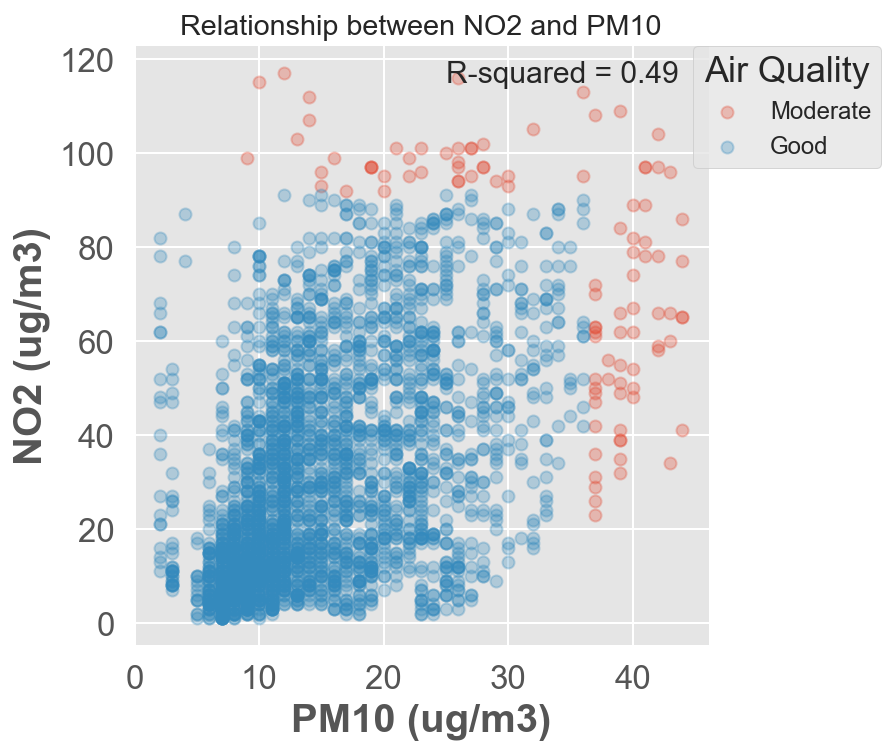

In [319]:
cor_p_n = air[['pm10_value','no2_value']].corr()
str_cor_p_n = str(round(cor_p_n.iloc[0,1], 2))
sns.lmplot(x='pm10_value', y='no2_value', data=air, hue='air_quality', fit_reg=False, scatter_kws={'alpha':0.3}, legend=False)
plt.annotate("R-squared = " + str_cor_p_n, xy=(25, 115), fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('Air Quality');
# set titles
plt.xlabel('PM10 (ug/m3)', fontsize=20, fontweight='bold');
plt.ylabel('NO2 (ug/m3)', fontsize=20, fontweight='bold');
plt.title('Relationship between NO2 and PM10');


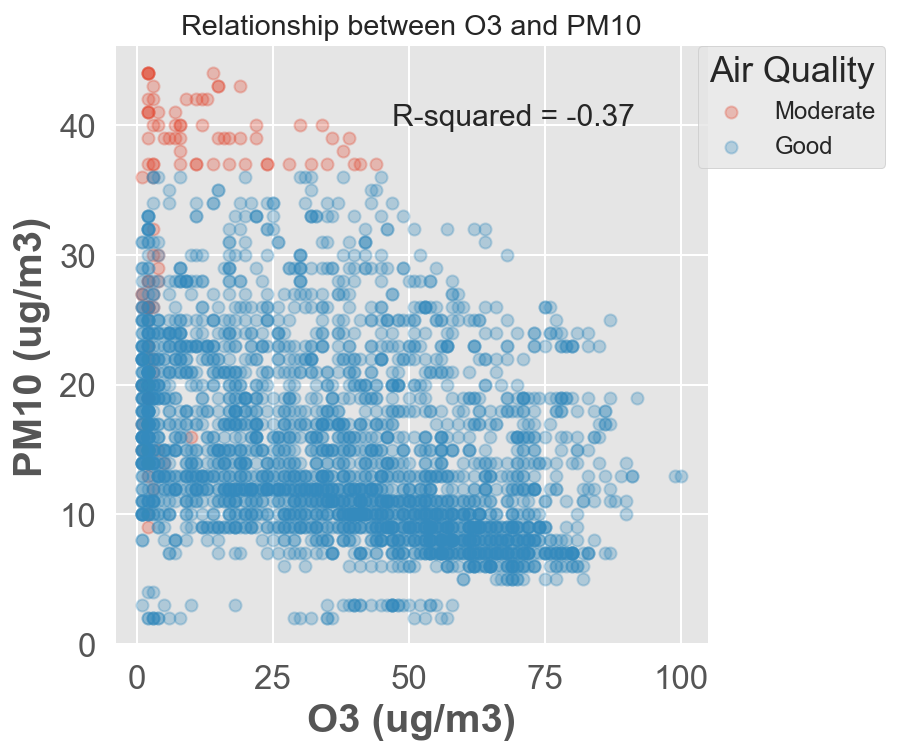

In [320]:
cor_o_p = air[['o3_value','pm10_value']].corr()
str_cor_o_p = str(round(cor_o_p.iloc[0,1], 2))
sns.lmplot(x='o3_value', y='pm10_value', data=air, hue='air_quality', fit_reg=False, scatter_kws={'alpha':0.3}, legend=False)
plt.annotate("R-squared = " + str_cor_o_p, xy=(47, 40), fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('Air Quality');
# set titles
plt.xlabel('O3 (ug/m3)', fontsize=20, fontweight='bold');
plt.ylabel('PM10 (ug/m3)', fontsize=20, fontweight='bold');
plt.title('Relationship between O3 and PM10');

In [264]:
loc_center = [air['latitude'].mean(), air['longitude'].mean()]

map1 = folium.Map(location = loc_center, tiles='Openstreetmap', zoom_start = 12, control_scale=True)
for index, loc in air.iterrows():
    folium.CircleMarker([loc['latitude'], loc['longitude']],     radius=2, weight=5, popup=loc['station']).add_to(map1)
folium.LayerControl().add_to(map1)
map1


## Conclusion

Port of Barcelona is a major tourist attraction for cruise ships which rely on heavy crude oil.

Impose a tax on cruise ships

O3 has not yet reached moderate level.

96% of AQI is in the 'Good' range.

Consider adopting WHO standard for NO2